## 1. Setup & Import Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Plot settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Colors
COLORS = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f39c12', '#1abc9c']

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


## 2. Load Data

In [3]:
# Path ke data
DATA_DIR = Path('../data/raw')

# List semua file parquet
parquet_files = sorted(DATA_DIR.glob('*.parquet'))
print(f"📁 Found {len(parquet_files)} parquet files:")
for f in parquet_files:
    size_mb = f.stat().st_size / (1024 * 1024)
    print(f"   - {f.name} ({size_mb:.1f} MB)")


📁 Found 5 parquet files:
   - yellow_tripdata_2024-01.parquet (47.6 MB)
   - yellow_tripdata_2024-02.parquet (48.0 MB)
   - yellow_tripdata_2024-03.parquet (57.3 MB)
   - yellow_tripdata_2024-04.parquet (56.4 MB)
   - yellow_tripdata_2024-05.parquet (59.7 MB)


In [4]:
# Load satu bulan dulu untuk eksplorasi (January 2024)
# Untuk EDA, kita tidak perlu load semua data

df = pd.read_parquet(DATA_DIR / 'yellow_tripdata_2024-01.parquet')
print(f"✅ Loaded data: {df.shape[0]:,} rows x {df.shape[1]} columns")


✅ Loaded data: 2,964,624 rows x 19 columns


## 3. Data Overview

In [5]:
# Lihat 5 baris pertama
print("📋 Sample Data (First 5 rows):")
df.head()


📋 Sample Data (First 5 rows):


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.00,1.72,1.00,N,186,79,2,17.70,1.00,0.50,0.00,0.00,1.00,22.70,2.50,0.00
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.00,1.80,1.00,N,140,236,1,10.00,3.50,0.50,3.75,0.00,1.00,18.75,2.50,0.00
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.00,4.70,1.00,N,236,79,1,23.30,3.50,0.50,3.00,0.00,1.00,31.30,2.50,0.00
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.00,1.40,1.00,N,79,211,1,10.00,3.50,0.50,2.00,0.00,1.00,17.00,2.50,0.00
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.00,0.80,1.00,N,211,148,1,7.90,3.50,0.50,3.20,0.00,1.00,16.10,2.50,0.00


In [6]:
# Info dataset
print("📊 Dataset Info:")
print("="*50)
df.info()


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airpor

In [7]:
# Deskripsi kolom
column_descriptions = {
    'VendorID': 'ID vendor (1=CMT, 2=VeriFone)',
    'tpep_pickup_datetime': 'Waktu pickup',
    'tpep_dropoff_datetime': 'Waktu dropoff',
    'passenger_count': 'Jumlah penumpang',
    'trip_distance': 'Jarak trip (miles)',
    'RatecodeID': 'Kode tarif (1=Standard, 2=JFK, 3=Newark, 4=Nassau, 5=Negotiated, 6=Group)',
    'store_and_fwd_flag': 'Trip disimpan dulu sebelum dikirim (Y/N)',
    'PULocationID': 'Pickup location zone ID',
    'DOLocationID': 'Dropoff location zone ID',
    'payment_type': 'Tipe pembayaran (1=Credit, 2=Cash, 3=No charge, 4=Dispute)',
    'fare_amount': '💰 Fare dasar (TARGET)',
    'extra': 'Extra charges (rush hour, overnight)',
    'mta_tax': 'MTA tax ($0.50)',
    'tip_amount': 'Tip (hanya credit card)',
    'tolls_amount': 'Biaya tol',
    'improvement_surcharge': 'Improvement surcharge ($0.30)',
    'total_amount': '💰 Total amount',
    'congestion_surcharge': 'Congestion surcharge ($2.50)',
    'Airport_fee': 'Airport fee ($1.25)'
}

print("📝 Column Descriptions:")
print("="*70)
for col in df.columns:
    desc = column_descriptions.get(col, 'No description')
    print(f"{col:30} | {desc}")


📝 Column Descriptions:
VendorID                       | ID vendor (1=CMT, 2=VeriFone)
tpep_pickup_datetime           | Waktu pickup
tpep_dropoff_datetime          | Waktu dropoff
passenger_count                | Jumlah penumpang
trip_distance                  | Jarak trip (miles)
RatecodeID                     | Kode tarif (1=Standard, 2=JFK, 3=Newark, 4=Nassau, 5=Negotiated, 6=Group)
store_and_fwd_flag             | Trip disimpan dulu sebelum dikirim (Y/N)
PULocationID                   | Pickup location zone ID
DOLocationID                   | Dropoff location zone ID
payment_type                   | Tipe pembayaran (1=Credit, 2=Cash, 3=No charge, 4=Dispute)
fare_amount                    | 💰 Fare dasar (TARGET)
extra                          | Extra charges (rush hour, overnight)
mta_tax                        | MTA tax ($0.50)
tip_amount                     | Tip (hanya credit card)
tolls_amount                   | Biaya tol
improvement_surcharge          | Improvement surcharge ($

In [9]:
#check fare amount == 48 .5
fare_48_5 = df[df['fare_amount'] >= 48]
fare_48_5


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
12,1,2024-01-01 00:35:16,2024-01-01 01:11:52,2.00,8.20,1.00,N,246,190,1,59.00,3.50,0.50,14.15,6.94,1.00,85.09,2.50,0.00
24,1,2024-01-01 00:42:05,2024-01-01 01:16:49,1.00,23.90,5.00,N,263,265,1,120.00,0.00,0.00,0.00,6.94,1.00,127.94,0.00,0.00
75,2,2024-01-01 00:46:16,2024-01-01 01:20:10,1.00,20.85,2.00,N,132,239,1,70.00,0.00,0.50,0.00,6.94,1.00,82.69,2.50,1.75
95,2,2024-01-01 00:54:16,2024-01-01 01:27:40,1.00,13.74,1.00,N,239,95,1,56.90,1.00,0.50,13.77,6.94,1.00,82.61,2.50,0.00
98,2,2024-01-01 00:50:28,2024-01-01 01:38:39,1.00,20.34,1.00,N,132,26,1,80.00,1.00,0.50,2.00,0.00,1.00,86.25,0.00,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964357,2,2024-01-31 22:39:00,2024-01-31 23:15:00,NaN,10.42,NaN,None,263,198,0,48.68,0.00,0.50,11.92,6.94,1.00,71.54,NaN,NaN
2964527,2,2024-01-31 22:05:00,2024-01-31 22:42:00,NaN,17.17,NaN,None,140,132,0,61.06,0.00,0.50,0.00,0.00,1.00,65.06,NaN,NaN
2964585,1,2024-01-31 23:39:20,2024-02-01 00:30:56,NaN,19.10,NaN,None,132,246,0,70.00,1.75,0.50,12.40,6.94,1.00,95.09,NaN,NaN
2964596,2,2024-01-31 23:24:24,2024-01-31 23:53:03,NaN,14.14,NaN,None,231,127,0,50.14,0.00,0.50,10.83,0.00,1.00,64.97,NaN,NaN


In [1]:
df.head()


NameError: name 'df' is not defined

In [7]:
# Statistik deskriptif
print("📈 Descriptive Statistics:")
df.describe()


📈 Descriptive Statistics:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,2964624.00,2964624,2964624,2824462.00,2964624.00,2824462.00,2964624.00,2964624.00,2964624.00,2964624.00,2964624.00,2964624.00,2964624.00,2964624.00,2964624.00,2964624.00,2824462.00,2824462.00
mean,1.75,2024-01-17 00:46:36.431092,2024-01-17 01:02:13.208130,1.34,3.65,2.07,166.02,165.12,1.16,18.18,1.45,0.48,3.34,0.53,0.98,26.80,2.26,0.14
min,1.00,2002-12-31 22:59:39,2002-12-31 23:05:41,0.00,0.00,1.00,1.00,1.00,0.00,-899.00,-7.50,-0.50,-80.00,-80.00,-1.00,-900.00,-2.50,-1.75
25%,2.00,2024-01-09 15:59:19.750000,2024-01-09 16:16:23,1.00,1.00,1.00,132.00,114.00,1.00,8.60,0.00,0.50,1.00,0.00,1.00,15.38,2.50,0.00
50%,2.00,2024-01-17 10:45:37.500000,2024-01-17 11:03:51.500000,1.00,1.68,1.00,162.00,162.00,1.00,12.80,1.00,0.50,2.70,0.00,1.00,20.10,2.50,0.00
75%,2.00,2024-01-24 18:23:52.250000,2024-01-24 18:40:29,1.00,3.11,1.00,234.00,234.00,1.00,20.50,2.50,0.50,4.12,0.00,1.00,28.56,2.50,0.00
max,6.00,2024-02-01 00:01:15,2024-02-02 13:56:52,9.00,312722.30,99.00,265.00,265.00,4.00,5000.00,14.25,4.00,428.00,115.92,1.00,5000.00,2.50,1.75
std,0.43,NaN,NaN,0.85,225.46,9.82,63.62,69.32,0.58,18.95,1.80,0.12,3.90,2.13,0.22,23.39,0.82,0.49


## 4. Missing Values Analysis

In [8]:
# Cek missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Missing %': missing_pct.values
}).sort_values('Missing Count', ascending=False)

print("🔍 Missing Values Analysis:")
print("="*50)
print(missing_df[missing_df['Missing Count'] > 0].to_string(index=False))

if missing_df['Missing Count'].sum() == 0:
    print("✅ No missing values found!")
else:
    print(f"\n⚠️ Total rows with missing values: {df.isnull().any(axis=1).sum():,}")


🔍 Missing Values Analysis:
              Column  Missing Count  Missing %
         Airport_fee         140162       4.73
congestion_surcharge         140162       4.73
     passenger_count         140162       4.73
          RatecodeID         140162       4.73
  store_and_fwd_flag         140162       4.73

⚠️ Total rows with missing values: 140,162


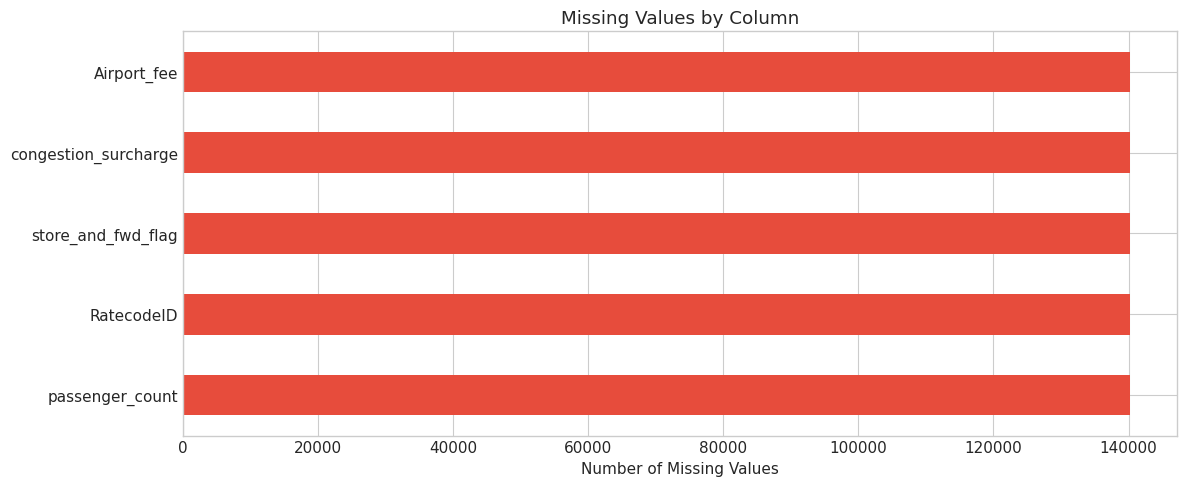

In [9]:
# Visualisasi missing values
if missing.sum() > 0:
    fig, ax = plt.subplots(figsize=(12, 5))
    missing_cols = missing[missing > 0].sort_values(ascending=True)
    missing_cols.plot(kind='barh', color=COLORS[3], ax=ax)
    ax.set_xlabel('Number of Missing Values')
    ax.set_title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values to visualize")


## 5. Target Variable Analysis (fare_amount)

In [10]:
# Statistik fare_amount
print("💰 Target Variable: fare_amount")
print("="*50)
print(df['fare_amount'].describe())

print(f"\n📊 Additional Statistics:")
print(f"   Median: ${df['fare_amount'].median():.2f}")
print(f"   Mode: ${df['fare_amount'].mode().values[0]:.2f}")
print(f"   Skewness: {df['fare_amount'].skew():.2f}")
print(f"   Kurtosis: {df['fare_amount'].kurtosis():.2f}")


💰 Target Variable: fare_amount
count   2964624.00
mean         18.18
std          18.95
min        -899.00
25%           8.60
50%          12.80
75%          20.50
max        5000.00
Name: fare_amount, dtype: float64

📊 Additional Statistics:
   Median: $12.80
   Mode: $8.60
   Skewness: 18.15
   Kurtosis: 3653.47


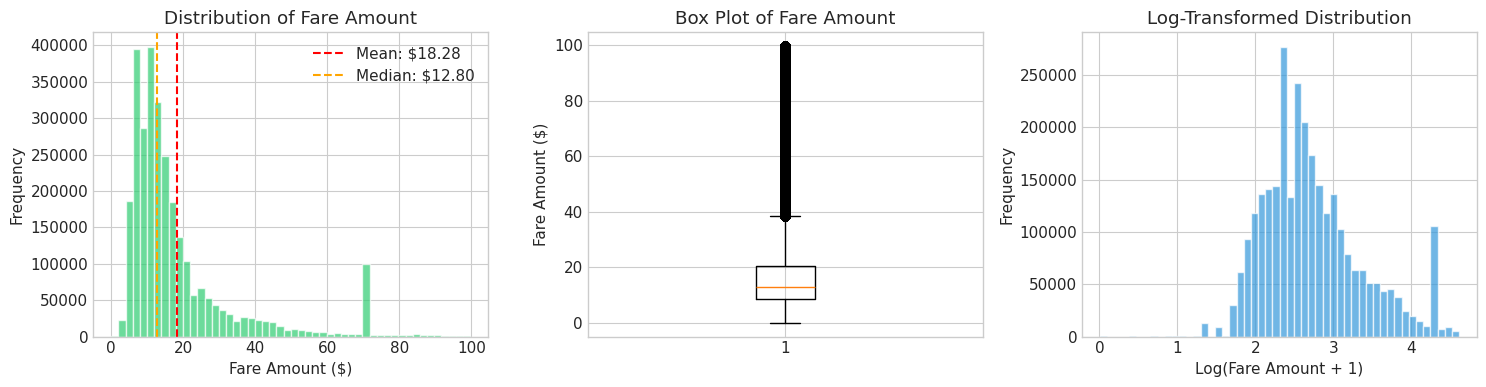

In [11]:
# Distribusi fare_amount
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Filter data yang reasonable untuk visualisasi
fare_filtered = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]['fare_amount']

# Histogram
axes[0].hist(fare_filtered, bins=50, color=COLORS[0], edgecolor='white', alpha=0.7)
axes[0].set_xlabel('Fare Amount ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Fare Amount')
axes[0].axvline(fare_filtered.mean(), color='red', linestyle='--', label=f'Mean: ${fare_filtered.mean():.2f}')
axes[0].axvline(fare_filtered.median(), color='orange', linestyle='--', label=f'Median: ${fare_filtered.median():.2f}')
axes[0].legend()

# Box plot
axes[1].boxplot(fare_filtered, vert=True)
axes[1].set_ylabel('Fare Amount ($)')
axes[1].set_title('Box Plot of Fare Amount')

# Log distribution
axes[2].hist(np.log1p(fare_filtered), bins=50, color=COLORS[1], edgecolor='white', alpha=0.7)
axes[2].set_xlabel('Log(Fare Amount + 1)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Log-Transformed Distribution')

plt.tight_layout()
plt.show()


In [12]:
# Identifikasi outliers di fare_amount
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)]

print("🔍 Outlier Analysis (fare_amount):")
print("="*50)
print(f"   Q1 (25%): ${Q1:.2f}")
print(f"   Q3 (75%): ${Q3:.2f}")
print(f"   IQR: ${IQR:.2f}")
print(f"   Lower Bound: ${lower_bound:.2f}")
print(f"   Upper Bound: ${upper_bound:.2f}")
print(f"\n   ⚠️ Outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
print(f"   Negative fares: {(df['fare_amount'] < 0).sum():,}")
print(f"   Zero fares: {(df['fare_amount'] == 0).sum():,}")
print(f"   Fares > $100: {(df['fare_amount'] > 100).sum():,}")
print(f"   Fares > $500: {(df['fare_amount'] > 500).sum():,}")


🔍 Outlier Analysis (fare_amount):
   Q1 (25%): $8.60
   Q3 (75%): $20.50
   IQR: $11.90
   Lower Bound: $-9.25
   Upper Bound: $38.35

   ⚠️ Outliers: 318,801 (10.75%)
   Negative fares: 37,448
   Zero fares: 893
   Fares > $100: 7,995
   Fares > $500: 46


## 6. Feature Analysis

### 6.1 Trip Distance

In [13]:
# Analisis trip_distance
print("📏 Trip Distance Analysis:")
print("="*50)
print(df['trip_distance'].describe())

print(f"\n⚠️ Anomalies:")
print(f"   Zero distance: {(df['trip_distance'] == 0).sum():,}")
print(f"   Distance > 50 miles: {(df['trip_distance'] > 50).sum():,}")
print(f"   Distance > 100 miles: {(df['trip_distance'] > 100).sum():,}")


📏 Trip Distance Analysis:
count   2964624.00
mean          3.65
std         225.46
min           0.00
25%           1.00
50%           1.68
75%           3.11
max      312722.30
Name: trip_distance, dtype: float64

⚠️ Anomalies:
   Zero distance: 60,371
   Distance > 50 miles: 412
   Distance > 100 miles: 59


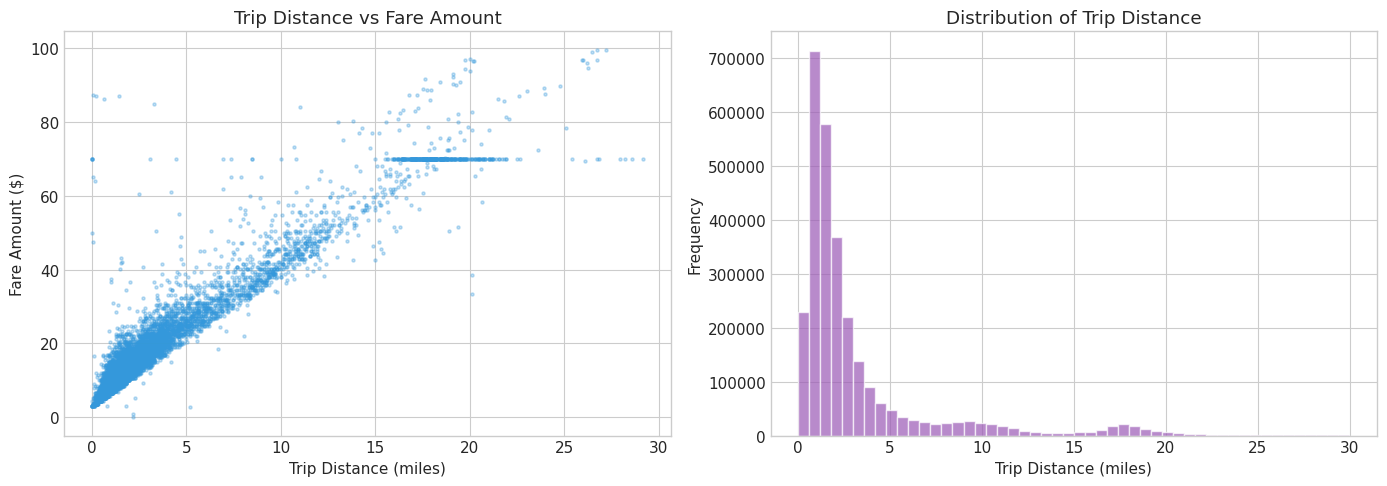

In [14]:
# Visualisasi trip_distance vs fare_amount
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Filter untuk visualisasi yang lebih baik
mask = (df['trip_distance'] > 0) & (df['trip_distance'] < 30) & \
       (df['fare_amount'] > 0) & (df['fare_amount'] < 100)
df_filtered = df[mask]

# Scatter plot
sample = df_filtered.sample(min(10000, len(df_filtered)), random_state=42)
axes[0].scatter(sample['trip_distance'], sample['fare_amount'], alpha=0.3, s=5, color=COLORS[1])
axes[0].set_xlabel('Trip Distance (miles)')
axes[0].set_ylabel('Fare Amount ($)')
axes[0].set_title('Trip Distance vs Fare Amount')

# Distribution
axes[1].hist(df_filtered['trip_distance'], bins=50, color=COLORS[2], edgecolor='white', alpha=0.7)
axes[1].set_xlabel('Trip Distance (miles)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Trip Distance')

plt.tight_layout()
plt.show()


### 6.2 Passenger Count

In [15]:
# Analisis passenger_count
print("👥 Passenger Count Analysis:")
print("="*50)
passenger_dist = df['passenger_count'].value_counts().sort_index()
print(passenger_dist)

print(f"\n⚠️ Anomalies:")
print(f"   Zero passengers: {(df['passenger_count'] == 0).sum():,}")
print(f"   > 6 passengers: {(df['passenger_count'] > 6).sum():,}")


👥 Passenger Count Analysis:
passenger_count
0.00      31465
1.00    2188739
2.00     405103
3.00      91262
4.00      51974
5.00      33506
6.00      22353
7.00          8
8.00         51
9.00          1
Name: count, dtype: int64

⚠️ Anomalies:
   Zero passengers: 31,465
   > 6 passengers: 60


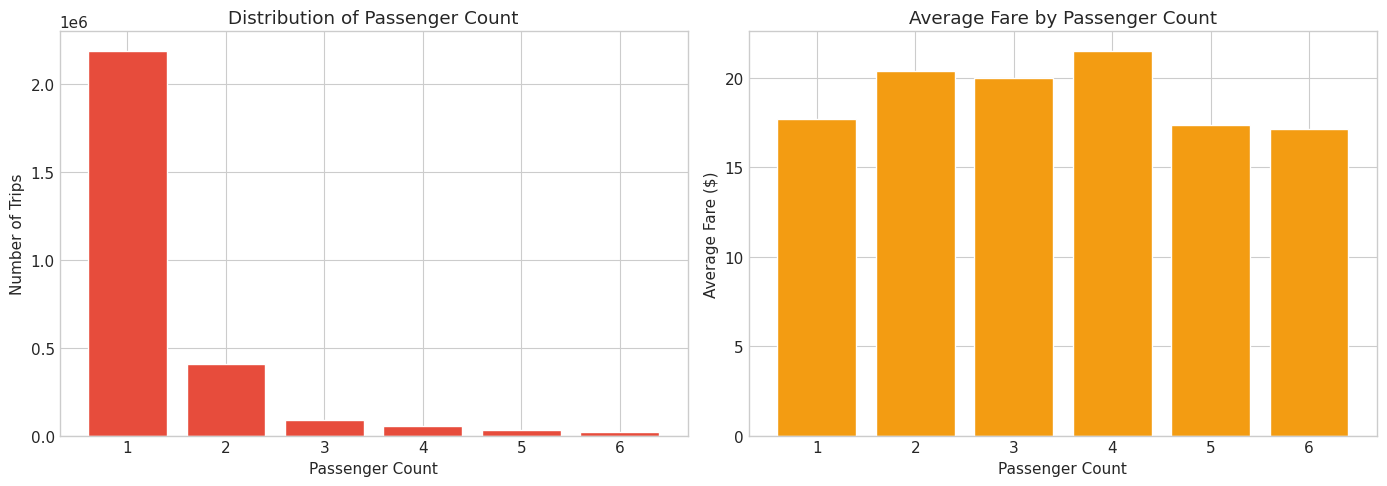

In [16]:
# Visualisasi passenger count
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
passenger_counts = df['passenger_count'].value_counts().sort_index()
valid_counts = passenger_counts[(passenger_counts.index >= 1) & (passenger_counts.index <= 6)]
axes[0].bar(valid_counts.index.astype(int), valid_counts.values, color=COLORS[3], edgecolor='white')
axes[0].set_xlabel('Passenger Count')
axes[0].set_ylabel('Number of Trips')
axes[0].set_title('Distribution of Passenger Count')
axes[0].set_xticks(range(1, 7))

# Fare by passenger count
fare_by_passenger = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6) & 
                       (df['fare_amount'] > 0) & (df['fare_amount'] < 100)].groupby('passenger_count')['fare_amount'].mean()
axes[1].bar(fare_by_passenger.index.astype(int), fare_by_passenger.values, color=COLORS[4], edgecolor='white')
axes[1].set_xlabel('Passenger Count')
axes[1].set_ylabel('Average Fare ($)')
axes[1].set_title('Average Fare by Passenger Count')
axes[1].set_xticks(range(1, 7))

plt.tight_layout()
plt.show()


### 6.3 Time Analysis

In [17]:
# Extract time features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Trip duration
df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

print("⏰ Time Features Created:")
print("   - pickup_hour")
print("   - pickup_dayofweek")
print("   - pickup_day")
print("   - pickup_month")
print("   - trip_duration_minutes")


⏰ Time Features Created:
   - pickup_hour
   - pickup_dayofweek
   - pickup_day
   - pickup_month
   - trip_duration_minutes


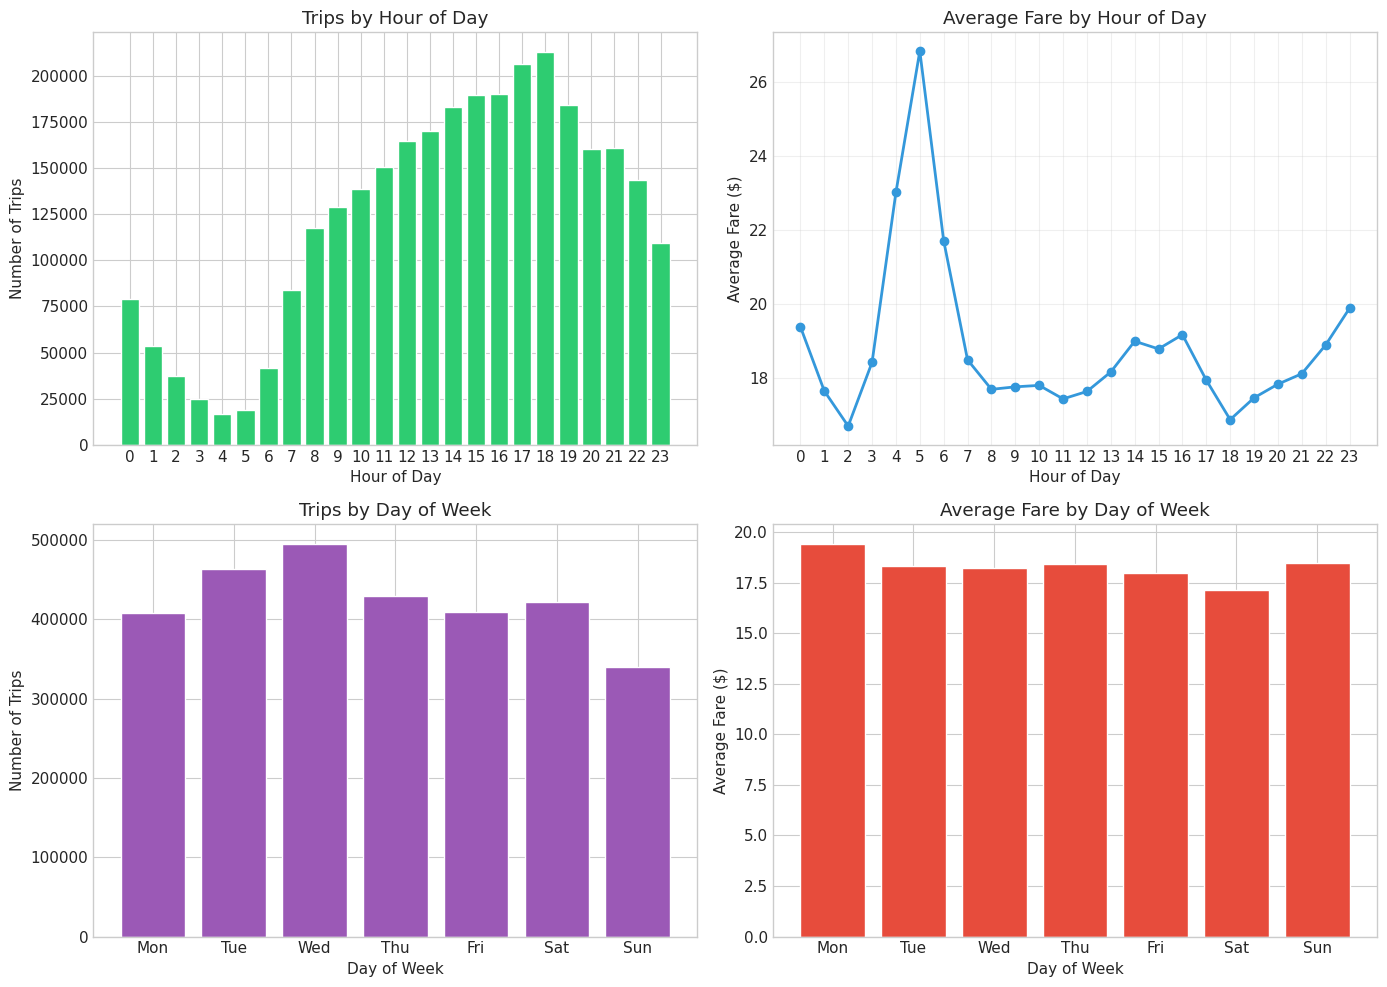

In [18]:
# Visualisasi waktu
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Trips by hour
hourly_trips = df['pickup_hour'].value_counts().sort_index()
axes[0, 0].bar(hourly_trips.index, hourly_trips.values, color=COLORS[0], edgecolor='white')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Number of Trips')
axes[0, 0].set_title('Trips by Hour of Day')
axes[0, 0].set_xticks(range(0, 24))

# Average fare by hour
mask = (df['fare_amount'] > 0) & (df['fare_amount'] < 100)
hourly_fare = df[mask].groupby('pickup_hour')['fare_amount'].mean()
axes[0, 1].plot(hourly_fare.index, hourly_fare.values, marker='o', color=COLORS[1], linewidth=2)
axes[0, 1].set_xlabel('Hour of Day')
axes[0, 1].set_ylabel('Average Fare ($)')
axes[0, 1].set_title('Average Fare by Hour of Day')
axes[0, 1].set_xticks(range(0, 24))
axes[0, 1].grid(True, alpha=0.3)

# Trips by day of week
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_trips = df['pickup_dayofweek'].value_counts().sort_index()
axes[1, 0].bar(range(7), daily_trips.values, color=COLORS[2], edgecolor='white')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Number of Trips')
axes[1, 0].set_title('Trips by Day of Week')
axes[1, 0].set_xticks(range(7))
axes[1, 0].set_xticklabels(days)

# Average fare by day of week
daily_fare = df[mask].groupby('pickup_dayofweek')['fare_amount'].mean()
axes[1, 1].bar(range(7), daily_fare.values, color=COLORS[3], edgecolor='white')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Average Fare ($)')
axes[1, 1].set_title('Average Fare by Day of Week')
axes[1, 1].set_xticks(range(7))
axes[1, 1].set_xticklabels(days)

plt.tight_layout()
plt.show()


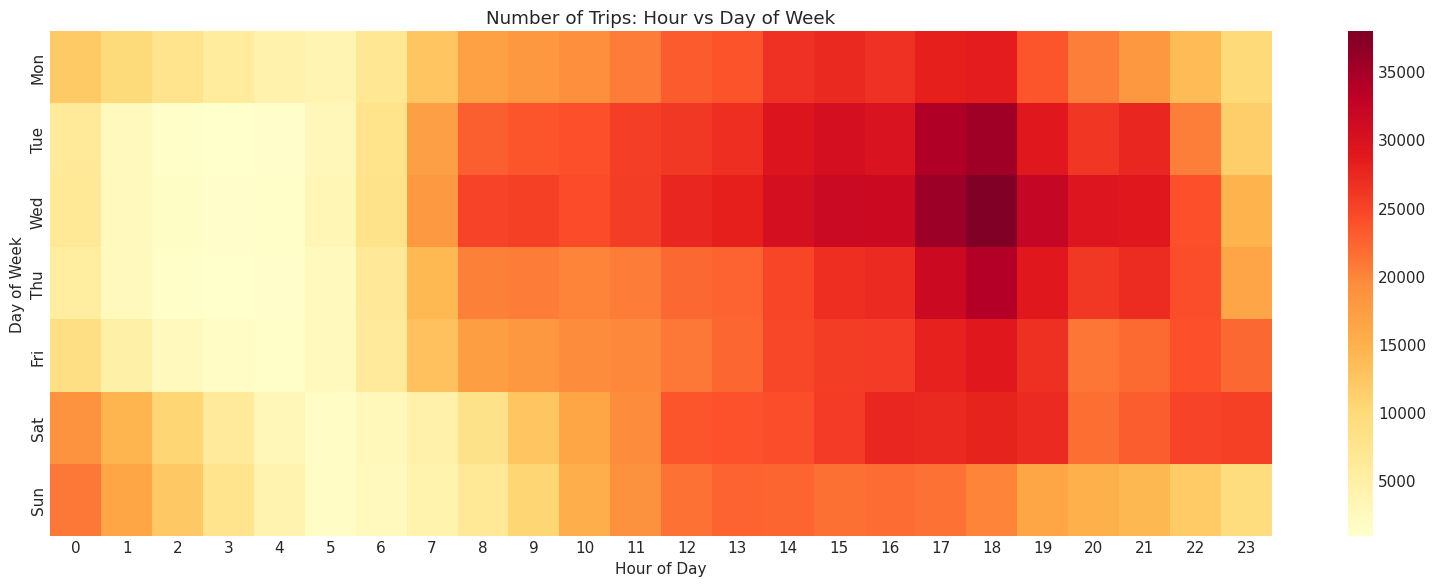

In [19]:
# Heatmap: Hour vs Day of Week
pivot_trips = df.pivot_table(values='fare_amount', index='pickup_dayofweek', 
                              columns='pickup_hour', aggfunc='count')

fig, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(pivot_trips, cmap='YlOrRd', ax=ax, fmt='.0f')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Day of Week')
ax.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax.set_title('Number of Trips: Hour vs Day of Week')
plt.tight_layout()
plt.show()


### 6.4 Trip Duration Analysis

In [20]:
# Analisis trip duration
print("⏱️ Trip Duration Analysis:")
print("="*50)
print(df['trip_duration_minutes'].describe())

print(f"\n⚠️ Anomalies:")
print(f"   Negative duration: {(df['trip_duration_minutes'] < 0).sum():,}")
print(f"   Zero duration: {(df['trip_duration_minutes'] == 0).sum():,}")
print(f"   > 60 minutes: {(df['trip_duration_minutes'] > 60).sum():,}")
print(f"   > 120 minutes: {(df['trip_duration_minutes'] > 120).sum():,}")


⏱️ Trip Duration Analysis:
count   2964624.00
mean         15.61
std          34.85
min         -13.57
25%           7.15
50%          11.63
75%          18.68
max        9455.40
Name: trip_duration_minutes, dtype: float64

⚠️ Anomalies:
   Negative duration: 56
   Zero duration: 814
   > 60 minutes: 30,597
   > 120 minutes: 2,742


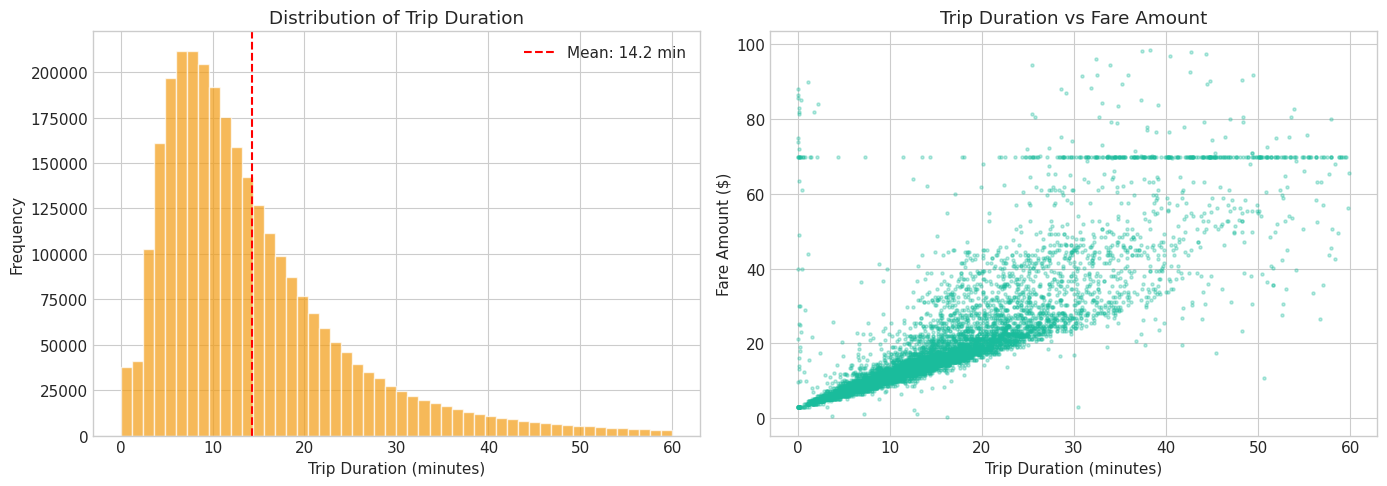

In [21]:
# Visualisasi trip duration
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Filter reasonable durations
duration_mask = (df['trip_duration_minutes'] > 0) & (df['trip_duration_minutes'] < 60)
df_duration = df[duration_mask]

# Distribution
axes[0].hist(df_duration['trip_duration_minutes'], bins=50, color=COLORS[4], edgecolor='white', alpha=0.7)
axes[0].set_xlabel('Trip Duration (minutes)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Trip Duration')
axes[0].axvline(df_duration['trip_duration_minutes'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df_duration["trip_duration_minutes"].mean():.1f} min')
axes[0].legend()

# Duration vs Fare
sample = df_duration[(df_duration['fare_amount'] > 0) & (df_duration['fare_amount'] < 100)].sample(10000, random_state=42)
axes[1].scatter(sample['trip_duration_minutes'], sample['fare_amount'], alpha=0.3, s=5, color=COLORS[5])
axes[1].set_xlabel('Trip Duration (minutes)')
axes[1].set_ylabel('Fare Amount ($)')
axes[1].set_title('Trip Duration vs Fare Amount')

plt.tight_layout()
plt.show()


### 6.5 Payment Type Analysis

In [22]:
# Payment type distribution
payment_labels = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute'}
payment_dist = df['payment_type'].value_counts().sort_index()

print("💳 Payment Type Distribution:")
print("="*50)
for ptype, count in payment_dist.items():
    label = payment_labels.get(ptype, f'Unknown ({ptype})')
    pct = count / len(df) * 100
    print(f"   {label}: {count:,} ({pct:.1f}%)")


💳 Payment Type Distribution:
   Unknown (0): 140,162 (4.7%)
   Credit Card: 2,319,046 (78.2%)
   Cash: 439,191 (14.8%)
   No Charge: 19,597 (0.7%)
   Dispute: 46,628 (1.6%)


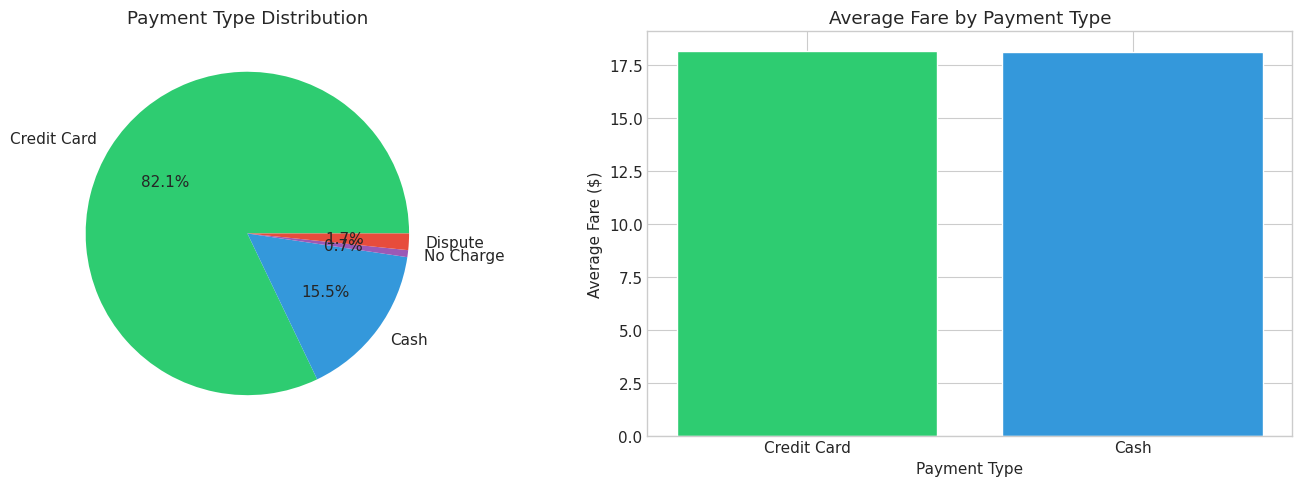

In [23]:
# Visualisasi payment type
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
valid_payments = payment_dist[payment_dist.index.isin([1, 2, 3, 4])]
labels = [payment_labels.get(i, str(i)) for i in valid_payments.index]
axes[0].pie(valid_payments.values, labels=labels, autopct='%1.1f%%', colors=COLORS[:len(valid_payments)])
axes[0].set_title('Payment Type Distribution')

# Average fare by payment type
mask = (df['fare_amount'] > 0) & (df['fare_amount'] < 100) & (df['payment_type'].isin([1, 2]))
fare_by_payment = df[mask].groupby('payment_type')['fare_amount'].mean()
x_labels = [payment_labels[i] for i in fare_by_payment.index]
axes[1].bar(x_labels, fare_by_payment.values, color=[COLORS[0], COLORS[1]], edgecolor='white')
axes[1].set_xlabel('Payment Type')
axes[1].set_ylabel('Average Fare ($)')
axes[1].set_title('Average Fare by Payment Type')

plt.tight_layout()
plt.show()


### 6.6 Location Analysis

In [24]:
# Top pickup locations
top_pickup = df['PULocationID'].value_counts().head(10)
top_dropoff = df['DOLocationID'].value_counts().head(10)

print("📍 Top 10 Pickup Locations:")
print(top_pickup)
print("\n📍 Top 10 Dropoff Locations:")
print(top_dropoff)


📍 Top 10 Pickup Locations:
PULocationID
132    145240
161    143471
237    142708
236    136465
162    106717
230    106324
186    104523
142    104080
138     89533
239     88474
Name: count, dtype: int64

📍 Top 10 Dropoff Locations:
DOLocationID
236    142044
237    130249
161    111942
230     90603
142     89673
239     89105
170     86733
162     85238
141     83562
68      74517
Name: count, dtype: int64


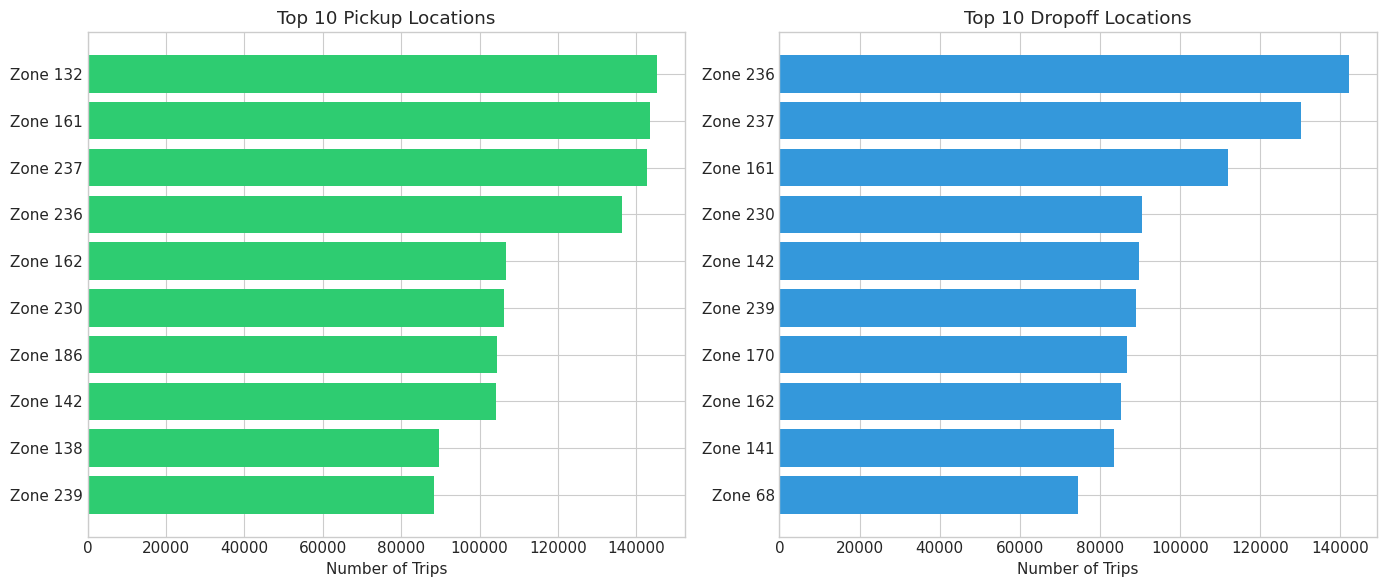

In [25]:
# Visualisasi top locations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top pickup
axes[0].barh(range(10), top_pickup.values[::-1], color=COLORS[0])
axes[0].set_yticks(range(10))
axes[0].set_yticklabels([f'Zone {z}' for z in top_pickup.index[::-1]])
axes[0].set_xlabel('Number of Trips')
axes[0].set_title('Top 10 Pickup Locations')

# Top dropoff
axes[1].barh(range(10), top_dropoff.values[::-1], color=COLORS[1])
axes[1].set_yticks(range(10))
axes[1].set_yticklabels([f'Zone {z}' for z in top_dropoff.index[::-1]])
axes[1].set_xlabel('Number of Trips')
axes[1].set_title('Top 10 Dropoff Locations')

plt.tight_layout()
plt.show()


## 7. Correlation Analysis

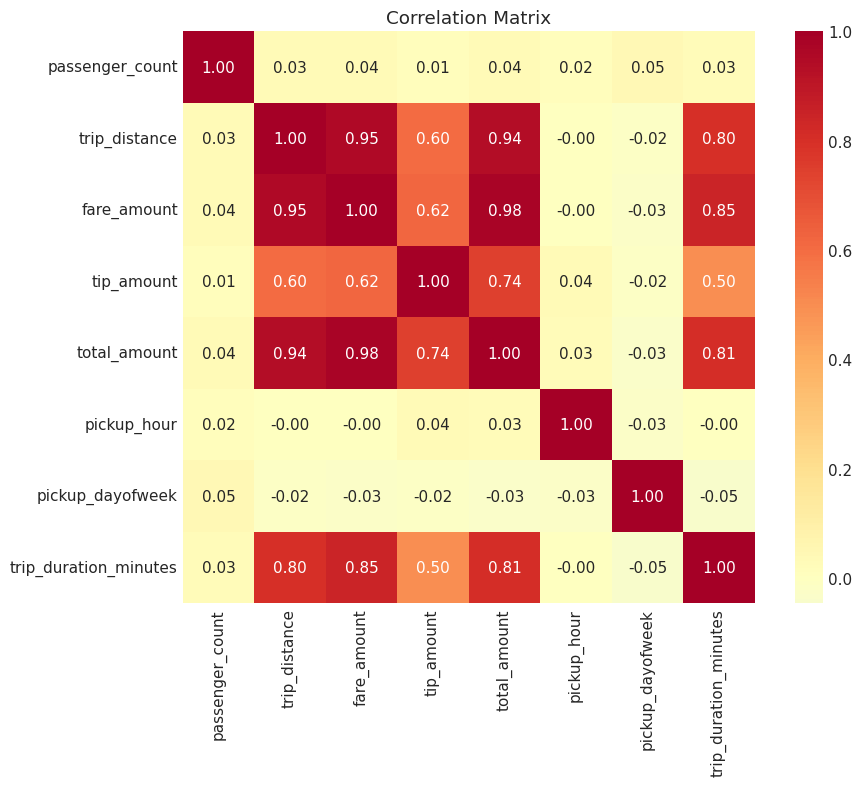

In [26]:
# Select numerical columns for correlation
numerical_cols = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 
                  'total_amount', 'pickup_hour', 'pickup_dayofweek', 'trip_duration_minutes']

# Filter valid data
mask = (df['fare_amount'] > 0) & (df['fare_amount'] < 100) & \
       (df['trip_distance'] > 0) & (df['trip_distance'] < 50) & \
       (df['trip_duration_minutes'] > 0) & (df['trip_duration_minutes'] < 120)

df_corr = df[mask][numerical_cols].dropna()

# Calculate correlation matrix
correlation_matrix = df_corr.corr()

# Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            fmt='.2f', square=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [27]:
# Correlation with target (fare_amount)
fare_correlations = correlation_matrix['fare_amount'].drop('fare_amount').sort_values(ascending=False)

print("📊 Correlation with fare_amount:")
print("="*50)
for feature, corr in fare_correlations.items():
    bar = '█' * int(abs(corr) * 20)
    sign = '+' if corr > 0 else '-'
    print(f"   {feature:25} {sign}{abs(corr):.3f} {bar}")


📊 Correlation with fare_amount:
   total_amount              +0.978 ███████████████████
   trip_distance             +0.954 ███████████████████
   trip_duration_minutes     +0.845 ████████████████
   tip_amount                +0.623 ████████████
   passenger_count           +0.039 
   pickup_hour               -0.001 
   pickup_dayofweek          -0.025 


## 8. Data Quality Summary

In [28]:
# Data quality summary
print("="*70)
print("                    📋 DATA QUALITY SUMMARY")
print("="*70)

total_rows = len(df)

issues = {
    'Missing passenger_count': df['passenger_count'].isna().sum(),
    'Zero/Negative fare': (df['fare_amount'] <= 0).sum(),
    'Fare > $500': (df['fare_amount'] > 500).sum(),
    'Zero trip distance': (df['trip_distance'] == 0).sum(),
    'Distance > 100 miles': (df['trip_distance'] > 100).sum(),
    'Zero passenger count': (df['passenger_count'] == 0).sum(),
    'Negative duration': (df['trip_duration_minutes'] < 0).sum(),
    'Duration > 3 hours': (df['trip_duration_minutes'] > 180).sum(),
}

print(f"\nTotal Records: {total_rows:,}")
print("\nData Quality Issues:")
print("-"*70)

total_issues = 0
for issue, count in issues.items():
    pct = count / total_rows * 100
    status = "✅" if pct < 1 else "⚠️" if pct < 5 else "❌"
    print(f"   {status} {issue:35} {count:>10,} ({pct:>5.2f}%)")
    total_issues += count

print("-"*70)
print(f"\n💡 Recommendation: Filter data dengan kriteria:")
print(f"   - fare_amount: $2.5 - $500")
print(f"   - trip_distance: 0.1 - 100 miles")
print(f"   - passenger_count: 1 - 6")
print(f"   - trip_duration: 1 - 180 minutes")


                    📋 DATA QUALITY SUMMARY

Total Records: 2,964,624

Data Quality Issues:
----------------------------------------------------------------------
   ⚠️ Missing passenger_count                140,162 ( 4.73%)
   ⚠️ Zero/Negative fare                      38,341 ( 1.29%)
   ✅ Fare > $500                                 46 ( 0.00%)
   ⚠️ Zero trip distance                      60,371 ( 2.04%)
   ✅ Distance > 100 miles                        59 ( 0.00%)
   ⚠️ Zero passenger count                    31,465 ( 1.06%)
   ✅ Negative duration                           56 ( 0.00%)
   ✅ Duration > 3 hours                       1,983 ( 0.07%)
----------------------------------------------------------------------

💡 Recommendation: Filter data dengan kriteria:
   - fare_amount: $2.5 - $500
   - trip_distance: 0.1 - 100 miles
   - passenger_count: 1 - 6
   - trip_duration: 1 - 180 minutes


## 9. Key Insights & Recommendations

In [29]:
print("="*70)
print("                    🔑 KEY INSIGHTS")
print("="*70)

insights = """
1. TARGET VARIABLE (fare_amount):
   - Right-skewed distribution (long tail ke kanan)
   - Median ($12.80) < Mean ($18.17) → ada outliers tinggi
   - Perlu filter outliers untuk training

2. STRONGEST PREDICTORS:
   - trip_distance: Korelasi tertinggi dengan fare (~0.95)
   - trip_duration: Korelasi tinggi (~0.85)
   - Kedua fitur ini WAJIB ada

3. TIME PATTERNS:
   - Peak hours: 6-9 AM dan 5-8 PM (rush hour)
   - Weekend vs Weekday pattern berbeda
   - Fitur waktu penting untuk model

4. LOCATION:
   - Zone 132, 138, 161, 237 paling populer
   - Location ID bisa jadi fitur penting

5. DATA QUALITY:
   - ~5% missing passenger_count
   - Outliers perlu di-handle
   - Negative/zero values perlu difilter
"""
print(insights)

print("="*70)
print("                    📝 NEXT STEPS")
print("="*70)
print("""
1. Data Preprocessing:
   - Handle missing values
   - Filter outliers
   - Feature engineering (time features, duration, etc.)

2. Feature Engineering:
   - Cyclic encoding untuk hour/dayofweek
   - Is_weekend flag
   - Rush hour indicator
   - Speed (distance/duration)

3. Model Training:
   - Compare: Linear Regression, Random Forest, XGBoost, LightGBM
   - Use MLFlow for tracking
""")


                    🔑 KEY INSIGHTS

1. TARGET VARIABLE (fare_amount):
   - Right-skewed distribution (long tail ke kanan)
   - Median ($12.80) < Mean ($18.17) → ada outliers tinggi
   - Perlu filter outliers untuk training

2. STRONGEST PREDICTORS:
   - trip_distance: Korelasi tertinggi dengan fare (~0.95)
   - trip_duration: Korelasi tinggi (~0.85)
   - Kedua fitur ini WAJIB ada

3. TIME PATTERNS:
   - Peak hours: 6-9 AM dan 5-8 PM (rush hour)
   - Weekend vs Weekday pattern berbeda
   - Fitur waktu penting untuk model

4. LOCATION:
   - Zone 132, 138, 161, 237 paling populer
   - Location ID bisa jadi fitur penting

5. DATA QUALITY:
   - ~5% missing passenger_count
   - Outliers perlu di-handle
   - Negative/zero values perlu difilter

                    📝 NEXT STEPS

1. Data Preprocessing:
   - Handle missing values
   - Filter outliers
   - Feature engineering (time features, duration, etc.)

2. Feature Engineering:
   - Cyclic encoding untuk hour/dayofweek
   - Is_weekend flag
  

In [30]:
print("\n✅ EDA Complete! Proceed to 02_preprocessing.ipynb")



✅ EDA Complete! Proceed to 02_preprocessing.ipynb
